In [28]:
# %matplotlib notebook

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [30]:
filename='C:\\Users\\Admin\\Desktop\\Data\\A304_MR\\A304_150K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value'])
df['multiplier'] = 10**6
df
(df['V5'],df['V6']) = (df['V6'], df['V5'])
(df['V7'],df['V8']) = (df['V8'], df['V7'])

# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [31]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[["I", "B","B_int","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000.217139,10000,150.106409,6316.462504,-6315.024298,5597.694202,-5597.093125,6314.193325,-6314.611974,5595.526647,-5595.424286,-0.000002,1000000
1,0.001,9000.479053,9000,150.002177,6318.494886,-6318.347954,5601.596240,-5601.538470,6319.337837,-6319.434035,5600.563192,-5600.418072,-0.000002,1000000
2,0.001,8000.322583,8000,149.999007,6324.072561,-6323.951209,5606.901630,-5606.728815,6324.991118,-6325.053697,5605.942688,-5605.861454,-0.000002,1000000
3,0.001,7000.497021,7000,149.999897,6329.927553,-6329.821383,5612.369193,-5612.326642,6330.835019,-6330.820667,5611.506818,-5611.336972,-0.000002,1000000
4,0.001,6000.274023,6000,149.999935,6335.935132,-6335.816899,5618.032852,-5617.958531,6336.734351,-6336.801497,5617.243912,-5617.022508,-0.000002,1000000


In [32]:

df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

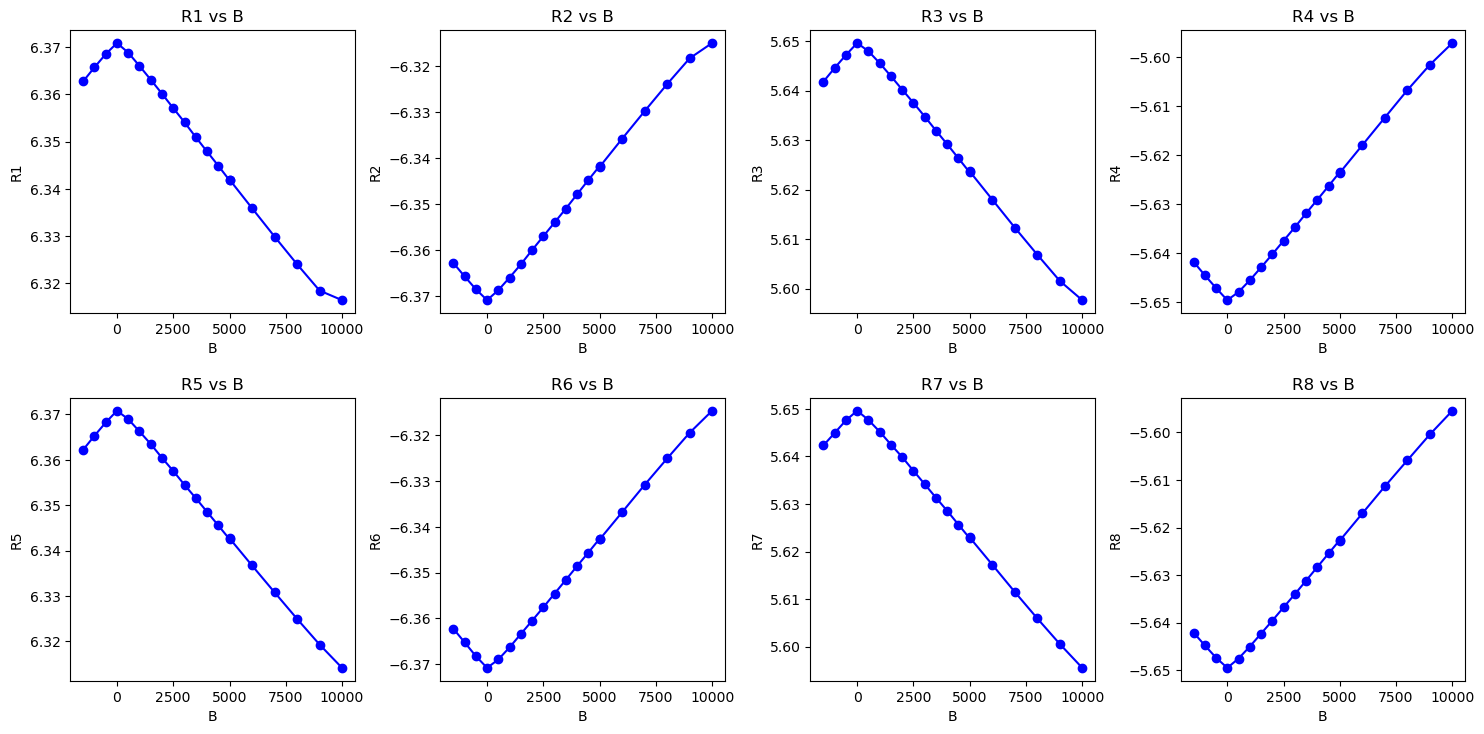

In [33]:
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(4,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(4,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(4,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(4,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(4,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(4,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(4,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

In [34]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

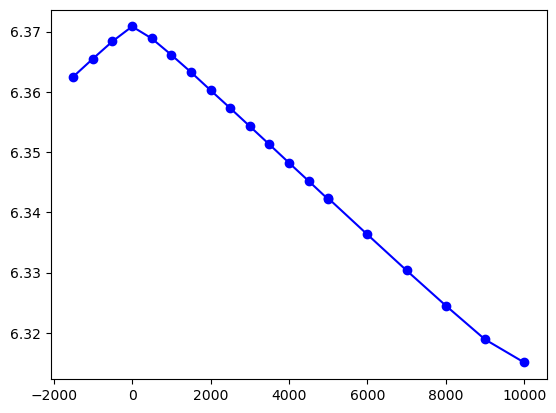

In [35]:
plt.plot(df['B_int'], df['Ra'],'bo-')

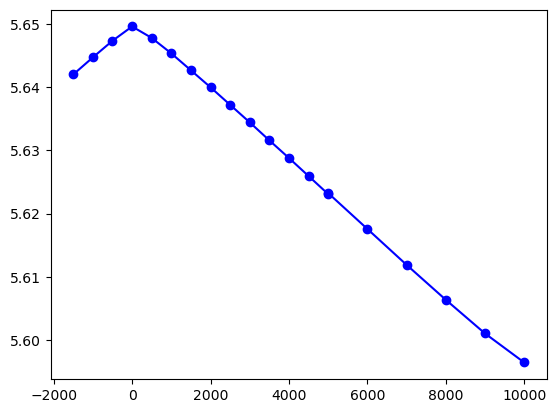

In [36]:
plt.plot(df['B_int'], df['Rb'],'bo-')
plt.show()

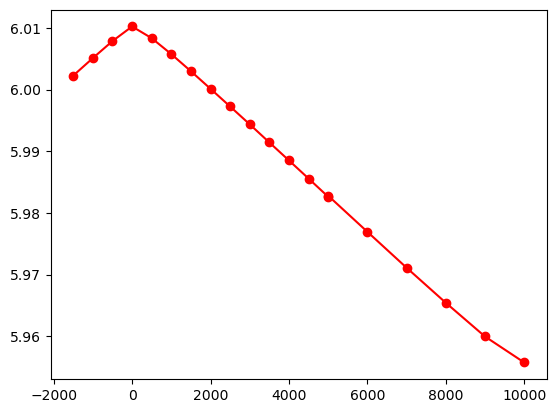

In [37]:
plt.plot(df['B_int'], df['R'], 'ro-')
plt.show()

In [38]:
# df.iloc
# df.loc
R0 = df.loc[df['B_int'] == 0]['R'].mean()
R0

6.010221605100375

In [39]:
df['MR'] = (df['R'] - R0)/R0*100

In [40]:
df[['B_int','MR']].head()

,B_int,MR
0,10000,-0.906253
1,9000,-0.836163
2,8000,-0.745126
3,7000,-0.650618
4,6000,-0.553697


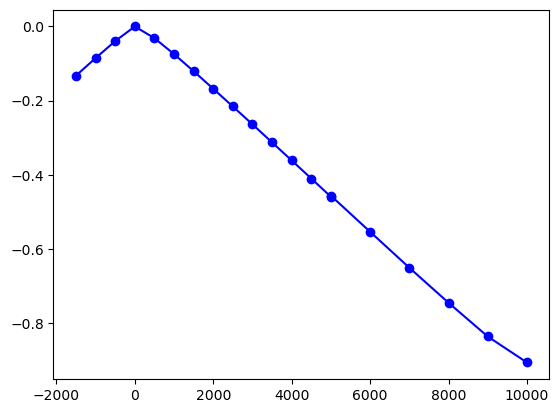

In [41]:
plt.plot(df['B_int'], df['MR'], 'bo-')

In [42]:
df.to_pickle('./pickle_data/MR_300K.pkl')

In [43]:
df['B'] = df['B_int']
df

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,...,R3,R4,R5,R6,R7,R8,Ra,Rb,R,MR
0,0.001,10000,10000,150.106409,6316.462504,-6315.024298,5597.694202,-5597.093125,6314.193325,-6314.611974,...,5.597694,-5.597093,6.314193,-6.314612,5.595527,-5.595424,6.315073,5.596435,5.955754,-0.906253
1,0.001,9000,9000,150.002177,6318.494886,-6318.347954,5601.596240,-5601.538470,6319.337837,-6319.434035,...,5.601596,-5.601538,6.319338,-6.319434,5.600563,-5.600418,6.318904,5.601029,5.959966,-0.836163
2,0.001,8000,8000,149.999007,6324.072561,-6323.951209,5606.901630,-5606.728815,6324.991118,-6325.053697,...,5.606902,-5.606729,6.324991,-6.325054,5.605943,-5.605861,6.324517,5.606359,5.965438,-0.745126
3,0.001,7000,7000,149.999897,6329.927553,-6329.821383,5612.369193,-5612.326642,6330.835019,-6330.820667,...,5.612369,-5.612327,6.330835,-6.330821,5.611507,-5.611337,6.330351,5.611885,5.971118,-0.650618
4,0.001,6000,6000,149.999935,6335.935132,-6335.816899,5618.032852,-5617.958531,6336.734351,-6336.801497,...,5.618033,-5.617959,6.336734,-6.336801,5.617244,-5.617023,6.336322,5.617564,5.976943,-0.553697
5,0.001,5000,5000,149.999429,6341.987544,-6341.918594,5623.706518,-5623.585294,6342.723708,-6342.754386,...,5.623707,-5.623585,6.342724,-6.342754,5.622948,-5.622722,6.342346,5.623241,5.982793,-0.456361
6,0.001,5000,5000,150.000576,6341.826263,-6341.725919,5623.496886,-5623.449196,6342.525560,-6342.587072,...,5.623497,-5.623449,6.342526,-6.342587,5.622776,-5.622611,6.342166,5.623083,5.982625,-0.459166
7,0.001,4500,4500,150.000439,6344.919971,-6344.767203,5626.354893,-5626.304416,6345.557990,-6345.616901,...,5.626355,-5.626304,6.345558,-6.345617,5.625645,-5.625444,6.345216,5.625937,5.985576,-0.410056
8,0.001,4000,4000,150.000095,6347.929654,-6347.863312,5629.190269,-5629.109959,6348.562378,-6348.569628,...,5.629190,-5.629110,6.348562,-6.348570,5.628551,-5.628297,6.348231,5.628787,5.988509,-0.361257
9,0.001,3500,3500,149.999757,6350.963465,-6350.984382,5631.964446,-5631.878972,6351.561206,-6351.588386,...,5.631964,-5.631879,6.351561,-6.351588,5.631313,-5.631161,6.351274,5.631579,5.991427,-0.312713


In [44]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [45]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,6315.743401,5597.393663,6314.402650,5595.475466,1000000
1,0.001,9000,6318.421420,5601.567355,6319.385936,5600.490632,1000000
2,0.001,8000,6324.011885,5606.815223,6325.022408,5605.902071,1000000
3,0.001,7000,6329.874468,5612.347918,6330.827843,5611.421895,1000000
4,0.001,6000,6335.876016,5617.995692,6336.767924,5617.133210,1000000
5,0.001,5000,6341.953069,5623.645906,6342.739047,5622.835111,1000000
6,0.001,5000,6341.776091,5623.473041,6342.556316,5622.693501,1000000
7,0.001,4500,6344.843587,5626.329655,6345.587446,5625.544703,1000000
8,0.001,4000,6347.896483,5629.150114,6348.566003,5628.424412,1000000
9,0.001,3500,6350.973923,5631.921709,6351.574796,5631.236917,1000000


In [46]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

-1500 10000


In [47]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec dataset

In [48]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)

data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 

data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [49]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [50]:
data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Dataset

In [51]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)

data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 

data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [52]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [53]:
data_inc['Ra'] = (data_inc['V15'] + data_inc['V37'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['Rb'] = (data_inc['V26'] + data_inc['V48'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['R'] = (data_inc['Ra'] + data_inc['Rb'])/2

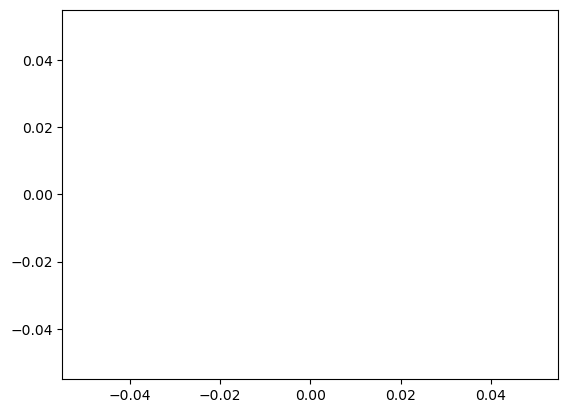

In [54]:

plt.plot(data_dec['B'],data_dec['R'], 'ro-')
plt.plot(data_inc['B'],data_inc['R'], 'ro-')